# NumPy Tutorial
Numpy has become the de facto standard package for general scientific computing in Python. Its core object is ndarray, a multidimensional array of a single data type, which can be sorted, reshaped, subject to mathematical operations and statistical analysis. It supports vectorization: a single operation can be carried out on an entire array, rather than requiring an explicit loop over the array's element. For example: 

c=[]

for i in range(n)

    c.append(a[i]*b[i])

if using NumPy arrays:

c=a*b

To use it, 

import numpy as np

You may refer to the NumPy User Guide for more details beyond this tutorial. 
[https://numpy.org/doc/stable/user/index.html](https://numpy.org/doc/stable/user/index.html)



In [23]:
import numpy as np

# Basic array creation
a = np.array((100,101,102,103))
b = np.array([[1.,2.],[3.,4.]])

b[0,1] # same as b[(0,1)]
b[1,1]=0 # also for assignment

np.array([-1,0,2.]) # mixture of int and float: upcast to float

# You can also explictly set the data type using optional dtype argument
np.array([0,4,-4], dtype=complex)

# Declare an array of a particular shape filled with default or arbitrary values. 
np.empty((2,2)) # initial element values undefined. Random junk defined from whatever were the contents of the memory that Python allocated for the array
np.zeros((3,2))
np.ones((3,3),dtype=int)

# If you already have an array and would like to create another with the same shape, 
np.ones_like(a)
np.zeros_like(a,dtype=float)

# Initialize an array from a sequence
np.arange(7)
np.arange(1.5,3.,0.5)
np.linspace(1,20,5) # generate an evenly spaced array of the five numbers between 1 and 20 inclusive
x,dx=np.linspace(0.,2*np.pi,100,retstep=True) # np.linspace has a couple of optional boolean arguments. Setting retstep to True returns the number spacing (step size)
dx

x=np.linspace(0,5,5, endpoint=False) # Setting endpoint to False omits the final point in the sequence, as for np.arange
x

# Initialize an array from a function
def f(i,j):
    return 2*i*j
np.fromfunction(f,(4,3))
np.fromfunction(lambda i,j:2*i*j,(4,3))


array([[ 0.,  0.,  0.],
       [ 0.,  2.,  4.],
       [ 0.,  4.,  8.],
       [ 0.,  6., 12.]])

***Practice Problem #1***

Create a "comb" of values in an array of length N for which every nth element is one but with zeros everywhere else. Let's say N=100, n=5. 

In [27]:
N,n=100,5
def f(i):
    return(i%n==0)*1
comb=np.fromfunction(f,(N,),dtype=int)
print(comb)

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [41]:
comb.shape # (rows, columns)
b.shape
comb.ndim
comb.size
comb.dtype
comb.data

## Universal Functions
In addition to the basic arithmetic operations of addition, division and more, NumPy provides many of the familiar mathematical functions that the math module does, implemented as so-called universal functions that act on each element of an array, producing an array in return without the need for an explicit loop. Universal functions are the way NumPy allows for vectorization, which promotes clean, efficient and easy-to-maintain code. 

In [56]:
x = np.linspace(1,5,5)
x**2
x-1
np.sqrt(x-1)
y=np.exp(-np.linspace(0.,2.,5))
np.sin(x-y)

# Array multiplication occurs elementwise: matrix multiplication is implemented by the @ operator or NumPy's dot function
a = np.array(((1,2),(3,4)))
b = a
a*b # elementwise multiplication
a@b # matrix multiplication; also a.dot(b) or np.dot(a,b)
np.dot(a,b)
a.sum() #sum together all numbers in the array

# Comparison and logic operators (~,& and | for not, and and or, respectively) are also vectorized and result in arrays of boolean values:
a = np.linspace(1,6,6)**3
print(a>100)
print((a<10) | (a>100))

[False False False False  True  True]
[ True  True False False  True  True]


## Changing the Shape of an Array


In [80]:
# flatten and ravel
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = a.flatten() # create an independent, flattened copy of a
b[3]=0
a # a is unchanged
# Assignemnt to b didn't change a because they are completely independent objects that do not share their data

c = a.ravel()
c[3]=0
c
a # a is changed
# The flattened array created by taking a view on a with ravel refers to the same underlying data. 

# resize and reshape
a = np.linspace(1,4,4)
a.resize(2,2) # reshapes a in place, doesn't return anything

# The reshape method returns a view on the array with its elements reshaped as required. The original array is not modified, but the objects share the same underlying data. 
a = np.linspace(1,4,4)
b = a.reshape(2,2)
print(b)
print(a)
b[0,0]=-99
print(b)
print(a)

# Transpose an Array
a = np.linspace(1,6,6).reshape(3,2)
a.transpose()
a.T

b = np.array([100,101,102,103])
b.transpose() # transpose a one-dimensional array returns the array unchanged

# Merging and splitting arrays
a = np.array([0,0,0,0])
b = np.array([1,1,1,1])
c = np.array([2,2,2,2])
np.vstack((a,b,c)) #stack arrays vertically
np.hstack((a,b,c)) #stack arrays horizontally
np.dstack((a,b,c)) #stack arrays depthwise (along a third axis)
# Note that the array created contains an independent copy of the data from the original arrays

a=np.arange(6)
np.hsplit(a,3) # the array is split into 3 equal-sized arrays
np.hsplit(a,(2,3,5)) # the array is split on those indexes


[[1. 2.]
 [3. 4.]]
[1. 2. 3. 4.]
[[-99.   2.]
 [  3.   4.]]
[-99.   2.   3.   4.]


[array([0, 1]), array([2]), array([3, 4]), array([5])]

## Indexing and Slicing an Array

In [96]:
a = np.linspace(1,6,6)
a[1:4:2] # a stride of 2 from element a[1] to element a[4]: index 1 and 3
a[3::-2] # a stride of -2 from a[3] to a[0]: index 3 and 1

# multidimensional arrays
a = np.linspace(1,12,12).reshape(4,3)
a[3,1]
a[2,:] #everything in the third row
a[:,1] #everything in the second column
a[1:-1,1:] #middle rows, second column onwards

# The special ellipsis notation (...) is useful for high-rank arrays: in an index, it represents as many colons as are necessary to represent the remaining axes. For example, for a four-dimensional array, a[3,1,...] is equivalent to a[3,1,:,:] and a[3,...,1] is equivalent to a[3,:,:,1]

# The colon and ellipsis syntax also works for assignment
a[:,1]=0
a[::2,:]
a[2:,:2]
a[1::2,::2]

# Instead of indexing an array with a sequence of integers, it is also possible to use an array of boolean values. The True elements of this indexing array identify elements in the target array to be returned. 
a = np.array([-2,-1,0,1,2])
ia = np.array([False, True, False, True, True])
a[ia]
ib=a<0
a[ib]
# it is not necessary to store the intermediate boolean array, ib
a[a<0]

# Meshes: To evaluate a multidimensional function on a grid of points, a mesh is useful. The function np.meshgrid passes a series of one-dimensional arrays representing coordinates along each dimension and returns a set of N-dimensional arrays comprising a mesh of coordinates at which the function can be evaluated. 
x = np.linspace(0,5,6)
y = np.linspace(0,3,4)
X,Y = np.meshgrid(x,y)
X

array([[0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.]])

## Maximum and Minimum Values

In [103]:
a = np.array([[3,0,-1,1],[2,-1,-2,4],[1,7,0,4]])
a.min() #global minimum
a.max() #global maximum
a.min(axis=0) #minima in each column
a.max(axis=1) #maxima in each row

# often, one wants not the maximum (or minimum) value itself but its index in the array. This is what the methods argmin and argmax do. 
a.argmin() #by default, the index returned is into the flattened array, so the actual value can be retrieved using a view on the array created by ravel. 
a.ravel()[a.argmin()]
a.argmax(axis=0) #row indexes of maxima in each column

array([0, 2, 2, 1])

***Practice Problem #2***

$$ f(x)=x^4-2x^3+7x^2-8x+9 $$
x is between -100 and 100. Find the global minimum x and f(x) values. 

0.7007007007007076

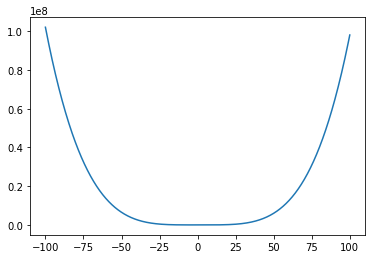

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-100,100,1000)
y=x**4-2*x**3+7*x**2-8*x+9
plt.plot(x,y,'-')

ymin=np.argmin(y)
xmin=x[ymin]
xmin

## Sorting an Array

In [123]:
# The sort method orders the numbers in an array in place. By default, this method sorts multidimensional arrays along their last axis. 
a = np.array([5,-1,2,4,0,4])
a.sort()
b = np.array([[0,3,-2],[7,1,3],[4,0,-1]])
b.sort()

b = np.array([[0,3,-2],[7,1,3],[4,0,-1]])
b.sort(axis=0) #sort the numbers along each column

a = np.array([3,0,-1,1])
np.argsort(a) #returns the indexes that would sort an array rather than the sorted elements themselves, therefore
a[np.argsort(a)] # this is the sorted array

# The method np.searchsorted takes a sorted array, a, and one or more values, v, and returns the indexes in a at which the values should be entered to maintain its order:
a = np.array([1,2,3,4])
np.searchsorted(a,3.5)
np.searchsorted(a,(3.5,0,1.1))

array([3, 0, 1])

## Arrays as Vectors

In [128]:
a = np.array([1,0,-3])
b = np.array([2,-2,5])
a.dot(b) #or a@b or b.dot(a) or np.dot(a,b)
np.cross(a,b) 

array([ -6, -11,  -2])

In [136]:
a = np.array([[1],[0],[-3]]) # note: this is column vector, not row vector
b = np.array([[2],[-2],[5]])
# np.dot(a,b) will throw out an error because shapes (3,1) and (3,1) are not aligned. 
a.T[0] #transpose to row vector
np.dot(a.T[0],b.T[0])
a.ravel()@b.ravel() # the same as a.ravel().dot(b.ravel())

# To turn a row vector represented by a one-dimensional array of shape (n,) into a column vector of shape (n,1), add an axis:
r = np.array([3,4,5])
r.shape
c=r[:,np.newaxis]
c.shape

(3, 1)

***Practice Problem #3***

Write a statement that returns True if an array is a monotonically increasing sequence or False otherwise. 

Hint: np.diff returns the difference between consecutive elements of a sequence. For example:

In [230]:
a = np.linspace(0,1,11)
np.diff(a)

5.500000000000001

## Statistical Methods


In [153]:
# Maxima and Minima (discussed already)

# Percentiles
a = np.array([[0.,0.6,1.2],[1.8,2.4,3.0]])
np.percentile(a,50) 
# the above returns a specified percentile of the data along an axis (or along a flattened version of the array if no axis is given). The median is the value at 50th percentile. Where no single value in the array corresponds to the requested percentile value exactly, a weighted average of the two nearest values is used. 

np.percentile(a,75)
np.percentile(a,50,axis=1)
np.percentile(a,75,axis=1)

#sum
np.sum(a) #sum up all values in the array

# Averages
x = np.array([1.,4.,9.,16.])
np.mean(x)
np.median(x)
np.average(x,weights=[0.,3.,1.,0])

x = np.array([[1.,8.,27],[-0.5,1.,0.]])
av,sw = np.average(x,weights=[0.,1.,0.1],axis=1,returned=True)
# av is the weighted average of each row, and sw is the sum of the weights. 

# Standard Deviations and Variances
x = np.array([1.,2.,3.,4.])
np.std(x) # or x.std(), uncorrected standard deviation
np.std(x,ddof=1) # corrected standard deviation

# The covariance is returnd by the np.cov method
X = np.array([[0.1,0.3,0.4,0.8,0.9],
            [3.2,2.4,2.4,0.1,5.5],
            [10.,8.2,4.3,2.6,0.9]])

np.cov(X) # This covariance matrix is a 3x3 array of values
# The diagonal elements are the variances in the vairable x, assuming N-1 degrees of freedom
np.var(X,axis=1,ddof=1)

# The correlation coefficient matrix is often used in preference to the covariance matrix as it is normalized. 
np.corrcoef(X)

array([[ 1.        ,  0.0874779 , -0.95363007],
       [ 0.0874779 ,  1.        , -0.11878687],
       [-0.95363007, -0.11878687,  1.        ]])

## Linear Algebra

In [215]:
# Basic Matrix Operations
A = np.array([[0,0.5],[-1,2]])
A*5 #Scalar multiplication
np.sin(A) #calculate sin of all array values
np.exp(A) #calculate the exponents of all array values
B = np.array([[2,-0.5],[3,1.5]])
A.dot(B) # or np.dot(A,B): matrix (dot) product or A@B
A*B # elementwise multiplication
A.transpose() # or A.T

#Identity Matrix
np.eye(3)
C = np.identity(3) # has determinant of 1
np.linalg.det(C)

# Raise a matrix to an (integer) power. It requires a method from the np.linalg submodule
np.linalg.matrix_power(A,3) # the same as A@A@A
# Note that the ** operator performs elementwise exponentiation:
A**3 # the same as A*A*A

#np.linalg.norm returns the norm of a matrix or vector. 
np.linalg.norm(A)

#np.linalg.det returns the determinant of a matrix
np.linalg.det(A)

#np.trace returns its trace - the sume of its diagonal elements
np.trace(A)

#np.linalg.inv find the inverse of a square matrix. An error will be thrown out if the matrix is non-invertible (singular matrix).
np.linalg.inv(A)

B = np.array([[2,4],[2,4]]) # a non-invertible matrix
np.linalg.pinv(B) #use pinv method instead to avoid the error

# Eigenvalues and Eigenvectors
vals,vecs=np.linalg.eig(A)
vals
vecs

# Solving a set of linear scalar equations that are expressed as the Matrix equation Mx=b
M = np.array([[3,-2,0],[-2,1,-3],[4,6,1]])
b = np.array([8,-20,7])
np.linalg.solve(M,b) # if no unique solution exists (for nonsquare or singular matrix, M), an error is raised. 

# np.linalg.svd returns the singular value decomposition (SVD) of a matrix, M, as the arrays, U, D and V, satisfying M=U@np.diag(D)@V. 
U,D,V=np.linalg.svd(M)
M_restructed=U@np.diag(D)@V
M_restructed


array([[ 3.00000000e+00, -2.00000000e+00,  5.89196072e-16],
       [-2.00000000e+00,  1.00000000e+00, -3.00000000e+00],
       [ 4.00000000e+00,  6.00000000e+00,  1.00000000e+00]])

## Calculus


In [217]:
# Integrals and derivatives
x = np.linspace(1,10,100)
y = 1/x**2 * np.sin(x)
dydx = np.gradient(y,x)
y_integral = np.cumsum(y)*(x[1]-x[0]) # or the interval can also be expressed as np.diff(x)[0]
np.diff(x)[0]

0.09090909090909083

***Practice Problem #4***

Let $y=e^{-x/10}\sin(x)$. Consider 10000 $x$ intervals in the range [0,10]
1. Plot the function $y$ vs. $x$ in the range [0,10]
1. compute the mean and standard deviation of $y$ for $x$ values in [4,7]
1. For $x$ in the range [4,7], find the value $y_m$ such that 80% of $y$ values are less than $y_m$
1. Plot $dy/dx$ vs. $x$
1. Find the locations where $dy/dx=0$

array([1.472, 4.613, 7.755])

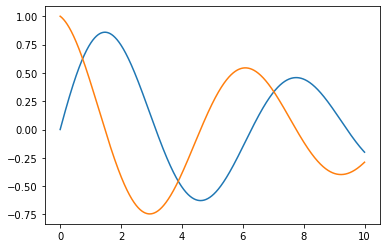

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
#1
N = 10000
x = np.linspace(0,10,N+1)
y = np.exp(-x/10)*np.sin(x)
plt.plot(x,y)

#2
np.mean(y[(x>=4)*(x<=7)]) # You can also use @ to express "and", as follows:
np.std(y[(x>=4)&(x<=7)]) 

#3
np.percentile(y[(x>=4)&(x<=7)],80)

#4
plt.plot(x,np.gradient(y,x))

#5
dydx=np.gradient(y,x)
x[1:][dydx[1:]*dydx[:-1]<0]

***Practice Problem #5***

Sum together every number from 0 to 10000 except those that can be divided by 4 or 7. Do this in one line of code if possible.

In [228]:
np.arange(0,10001,1)[(np.arange(0,10001,1)%4!=0)&(np.arange(0,10001,1)%7!=0)].sum()

32147142

## Random Sampling
NumPy's random module provides methods for obtaining random numbers from any of several distributions as well as convenient ways to choose random entries from an array and to randomly shuffle the contents of an array. 

In [214]:
#np.random.randint
np.random.seed(42)
np.random.randint(1,10,10) # 10 random integers in [1,10)

# Uniformly distributed random numbers

# Random floating-point numbers
np.random.random_sample((3,2)) #uniform distribution over [0,1)
# If you want numbers sampled from uniform distribution over [a,b), you need to do a bit of work:
a,b=10,20
a+(b-a)*np.random.random_sample((3,2))
# np.random.rand method is similar, but is passed the dimensions of the desired array as separate arguments
np.random.rand(3,2)

# Random integers
np.random.randint(4) # random integer from [0,4)
np.random.randint(4,size=10) # 10 random integers from [0,4)
np.random.randint(4,size=(3,5)) # array of random integers from [0,4)
np.random.randint(1,4,(3,5)) # array of random integers from [1,4)
#np.random.randint can be useful for selecting random elements (with replacement) from an array by picking random indexes:
a = np.array([6,6,6,7,7,7,7,7,7])
a[np.random.randint(len(a),size=5)]
# np.random.randintegers has the same syntax but returns integers sampled from uniform distribution over the closed interval [low,high]

# Normal Distribution

np.random.normal()
np.random.normal(scale=5.,size=3)
np.random.normal(100.,8.,size=(4,2))

np.random.randn(2,2) # mu=0,sigma=1. It does not provide a way to set the mean and std explicitly, but the distribution can be easily rescaled as follows:
mu,sigma=100.,8.
mu+sigma*np.random.randn(4,2)

# Binomial Distribution np.random.binomial(n,p): n independent experiments and p is the probability of a single particular outcome
np.random.binomial(4,0.5)
np.random.binomial(4,0.5,(4,4))

# Poisson Distribution np.random.poisson takes lambda as its first argument (which defaults to 1) and the shape of the desired array of samples can be specified with a second argument, size. For example, if I receive an average of 2.5 emails an hour, a sample of the number of emails I receive each hour over the next 8 hours could be obtained as:
np.random.poisson(2.5,8)

# Random Selections, Shuffling and Permutations
np.random.choice([1,5,2,-5,5,2,0])
np.random.choice(np.arange(10))

a = np.array([1,2,0,-1,1])
np.random.choice(a,6) # six random selections from a
np.random.choice(a,(2,2),replace=False) 
np.random.choice(a,(3,2)) #np.random.choice(a,(3,2),replace=False) will throw out an error, because it cannot take a larger sample than population if you are sampling without replacement

# You can specify the probability of each element being selected. To do this, pass a sequence of the same length as the population to be sampled as argument p. The probabilities should sum to 1. 
np.random.choice(a,5,p=[0.1,0.1,0,0.7,0.1])
np.random.choice(a,2,False,p=[0.1,0.1,0,0.8,0]) # sample without replacement

# Two methods for permuting the contents of an array: np.random.shuffle randomly rearranges the order the elements in place whereas np.random.permutation makes a copy of the array first, leaving the original unchanged. 
a = np.arange(6)
np.random.permutation(a)
a
np.random.shuffle(a)
a
a = np.arange(6).reshape(3,2)
np.random.shuffle(a) # The method only act on the first dimension of the array
np.random.permutation(a) # permutes the rows, but not the columns
a


array([[0, 1],
       [2, 3],
       [4, 5]])